# Multi-variate Linear Regression

### 1. Import necessary libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("./taxi.csv")
df.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


### 2. Visualize the data

Pair-plot to see the co-relation between features

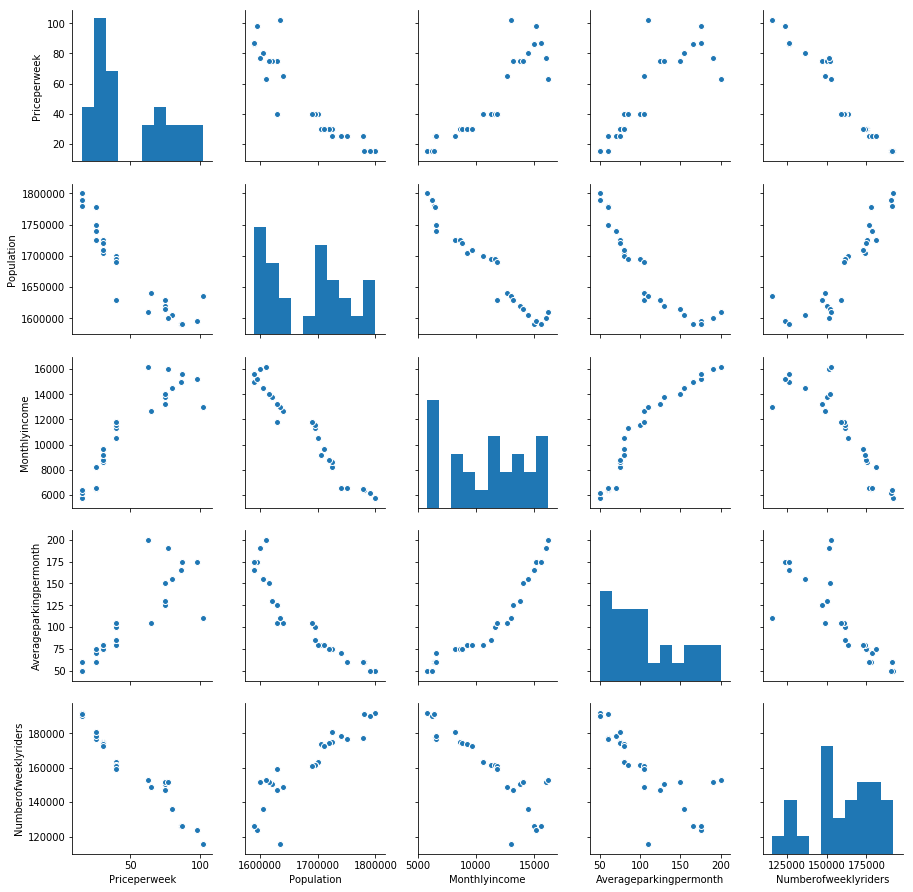

In [3]:
sns.pairplot(df)

Heat-maps to see the co-relation mathematically

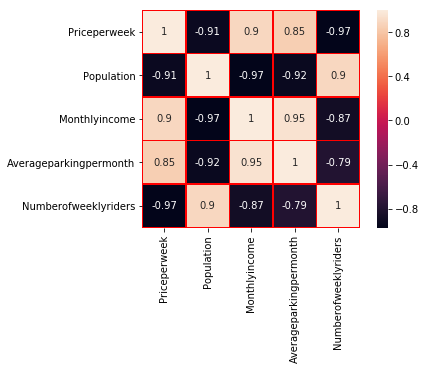

In [4]:
sns.heatmap(df.corr(), linewidths=0.2, vmax=1.0, square=True, linecolor="red", annot=True)

### 3. Extract the features and labels

In [5]:
# i.e. all of our x
features = df.iloc[:,0:-1]
features

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth
0,15,1800000,5800,50
1,15,1790000,6200,50
2,15,1780000,6400,60
3,25,1778000,6500,60
4,25,1750000,6550,60
5,25,1740000,6580,70
6,25,1725000,8200,75
7,30,1725000,8600,75
8,30,1720000,8800,75
9,30,1705000,9200,80


In [6]:
labels = df.iloc[:,-1]
labels

0     192000
1     190400
2     191200
3     177600
4     176800
5     178400
6     180800
7     175200
8     174400
9     173920
10    172800
11    163200
12    161600
13    161600
14    160800
15    159200
16    148800
17    115696
18    147200
19    150400
20    152000
21    136000
22    126240
23    123888
24    126080
25    151680
26    152800
Name: Numberofweeklyriders, dtype: int64

In [7]:
features = features.values
labels = labels.values

### 4. Cross validation (test and train data sets spliting)

In [17]:
msk = np.random.rand(len(df)) < 0.8 # 80-20 spliting
train = df[msk]
test = df[~msk]

x_train = train.iloc[:, 0:-1].values
y_train = train.iloc[:, -1].values

x_test = test.iloc[:, 0:-1].values
y_test = test.iloc[:, -1].values

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((18, 4), (18,), (9, 4), (9,))

Scikit learn does it better

In [21]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21, 4), (21,), (6, 4), (6,))

### 5. Create the linear model

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 6. Predict the output

In [23]:
y_pred = regressor.predict(x_test)

### 7. Interpreting the coefficient  and the intercept

In [24]:
regressor.coef_, regressor.intercept_

(array([-5.89818682e+02,  9.11197840e-02, -4.65554739e-01,  1.04352093e+02]),
 31357.53650358389)

### 8. Predicting the score (accuracy %)

In [25]:
print("Train score: ", regressor.score(x_train, y_train))
print("Test score: ", regressor.score(x_test, y_test))

Train score:  0.9347981707182887
Test score:  0.940952435745748


### 9. Verification of the predicted value

$$
y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + ... + b_nx_n
$$

In [33]:
y_0 = regressor.intercept_ + regressor.coef_[0] * x_test[0][0] + regressor.coef_[1] * x_test[0][1] + regressor.coef_[2] * x_test[0][2] + regressor.coef_[3] * x_test[0][3]
y_0

187985.04703557826

### 9. Calculating the MSE and RMSE

In [35]:
from sklearn import metrics

print("MSE: ", metrics.mean_squared_error(y_pred, y_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MSE:  42664167.241402075
RMSE:  6531.781322227656
